## Simple Linear Regression

In [97]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , median_absolute_error
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

In [98]:
# read ur dataset 

data = pd.read_csv('satf.csv')
data.head()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47


In [99]:
# Feature & Target 

X = data.iloc[:,:1]
y = data.iloc[:,-1]

print(X)
print(y)

     high_GPA
0        3.45
1        2.78
2        2.52
3        3.67
4        3.24
..        ...
100      3.76
101      3.49
102      3.07
103      2.19
104      3.46

[105 rows x 1 columns]
0      3.52
1      2.91
2      2.40
3      3.47
4      3.47
       ... 
100    3.64
101    3.42
102    3.25
103    2.76
104    3.41
Name: univ_GPA, Length: 105, dtype: float64


In [100]:
# split ur data into training set and test set

X_train , X_test , y_train , y_test = train_test_split(X,y, train_size=0.2, random_state=0)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

     high_GPA
37       3.22
81       2.62
46       2.54
95       3.06
39       2.03
65       3.42
58       3.44
12       2.59
93       3.02
88       3.12
70       3.56
87       3.90
36       3.15
21       2.71
83       3.42
9        3.51
101      3.49
67       2.24
64       3.94
47       2.66
44       2.65
    high_GPA
26      2.64
61      3.24
2       2.52
62      3.29
85      3.28
..       ...
20      3.09
99      2.48
72      3.28
77      2.81
25      3.82

[84 rows x 1 columns]
37     3.47
81     3.12
46     2.52
95     3.24
39     2.74
65     3.01
58     3.52
12     3.19
93     3.28
88     3.28
70     3.38
87     3.59
36     3.17
21     3.19
83     3.50
9      3.32
101    3.42
67     2.34
64     3.71
47     3.08
44     3.28
Name: univ_GPA, dtype: float64
26    2.40
61    3.38
2     2.40
62    3.41
85    3.48
      ... 
20    3.29
99    2.08
72    3.31
77    3.20
25    3.81
Name: univ_GPA, Length: 84, dtype: float64


In [101]:
# fit simple lienar regression to training set 

linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [102]:
print(linreg.score(X_train,y_train))
print(linreg.score(X_test, y_test))

0.642121933013659
0.5557008049503895


In [103]:
# predicting the test set results 
y_pred = linreg.predict(X_test)
y_pred

array([2.98905701, 3.29955211, 2.926958  , 3.3254267 , 3.32025179,
       3.28402736, 3.64627164, 3.56864786, 3.24780293, 2.87003389,
       3.44444982, 3.27367752, 3.09255538, 3.41340031, 2.8441593 ,
       3.4651495 , 2.89590849, 3.49102409, 3.6928459 , 2.87520881,
       3.08738046, 3.3254267 , 3.5220736 , 3.42375015, 3.54794819,
       3.49619901, 3.08220554, 3.39270064, 3.43927491, 3.32025179,
       3.62557196, 2.77688536, 3.26332768, 3.49102409, 3.02528144,
       2.75618569, 2.73548602, 3.11842997, 2.70443651, 3.00458177,
       3.39270064, 3.41340031, 3.06150587, 3.13395473, 3.12877981,
       3.44444982, 3.29955211, 3.52724852, 3.54794819, 3.24780293,
       2.80793487, 2.70961143, 3.05115603, 2.78206028, 3.4082254 ,
       2.926958  , 3.3513013 , 2.90625832, 3.52724852, 2.7303111 ,
       3.02528144, 3.34095146, 3.0408062 , 3.42375015, 3.59452245,
       3.23227817, 3.08738046, 3.02010652, 3.08738046, 3.65144656,
       3.32025179, 3.43927491, 3.28402736, 2.90625832, 3.42375

In [104]:
def metrics(x,y):
    mean_error = mean_absolute_error(x,y)
    median_error = median_absolute_error(x,y)
    mean_squared = mean_squared_error(x,y)
    
    return mean_error , median_error , mean_squared 

metrics(y_test,y_pred)

(0.22273769173569435, 0.14828289553322804, 0.09786883636151644)

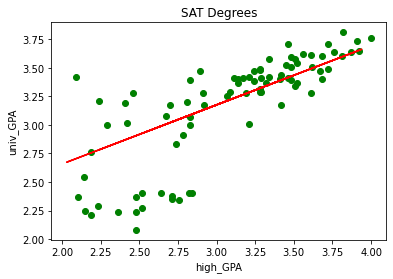

In [105]:
# visuzlize the training set results  
#plt.scatter(X_train,y_train, color='red')
plt.scatter(X_test,y_test, color='green')
plt.plot(X_train, linreg.predict(X_train), color ='red')
plt.title("SAT Degrees")
plt.xlabel('high_GPA')
plt.ylabel('univ_GPA')
plt.show()

## Multiple Linear Regression

In [106]:
# load boston data 

bostonData = load_boston()

X = bostonData.data
y = bostonData.target 

In [107]:
# split data 
'''
######RandomState instance, default=None
Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple
function calls.

#####shuffle bool default=True
Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [108]:
# apply Linear regression Model 

'''
#####fit_intercept   bool, default=True
Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations
(i.e. data is expected to be centered).

#####normalize  bool, default=False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression
by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use


#####copy_X bool, default=True
If True, X will be copied; else, it may be overwritten.

#####n_jobs  int, default=None
The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. 
None means 1 unless in a joblib.parallel_backend context. -1 means using all processors
'''

multi_reg = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
multi_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [109]:
# calculating details 
print('Linear Regression Train Score is : ', multi_reg.score(X_train, y_train))
print('Linear Regression Test Score is : ' , multi_reg.score(X_test, y_test))
print('Linear Regression Coef is : ' , multi_reg.coef_)
print('Linear Regression intercept is : ' ,multi_reg.intercept_)

Linear Regression Train Score is :  0.7391405291456344
Linear Regression Test Score is :  0.7194574243020463
Linear Regression Coef is :  [-1.52786535e-01  5.83438345e-02 -5.25729795e-02  1.74968794e+00
 -1.82628401e+01  3.19751214e+00 -1.82120263e-03 -1.79227933e+00
  3.02644015e-01 -1.26348509e-02 -8.73594266e-01  1.05892477e-02
 -4.68960863e-01]
Linear Regression intercept is :  40.16387456471213


In [110]:
# calculating prediction 

y_pred = multi_reg.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:5])


Predicted Value for Linear Regression is :  [18.08835763 24.29913209 21.29334432 35.15238698 11.99842784]


In [111]:
metrics(y_test,y_pred)

(3.6397935186115546, 2.5619786821948622, 27.593562379656767)

## Polynomial Regression

In [112]:
poly_data = pd.read_csv('Position_Salaries.csv')
poly_data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [116]:
X = poly_data.iloc[:,1:2]
y = poly_data.iloc[:,2]

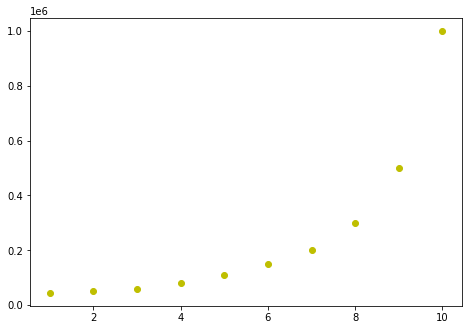

In [117]:
fig = plt.figure()  # Create a new figure, or activate an existing figure.
ax = fig.add_axes([1,1,1,1])
ax.scatter(X,y,color='y')
plt.show()

In [118]:
'''
####Polynomial Features
Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the
specified degre
'''
'''
####fit_transform() 
joins these two steps and is used for the initial fitting of parameters on the training set x, while also returning 
the transformed x′. Internally, the transformer object just calls first fit() and then transform() on the same data.

'''
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(X)

poly_reg = LinearRegression(x_poly,y)


c:\users\code\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]], normalize=0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

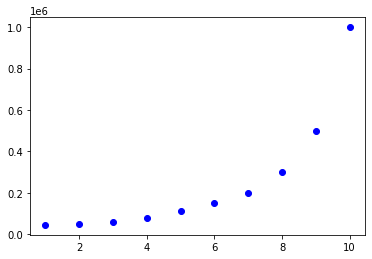

In [119]:
plt.scatter(X,y, color='blue')
plt.plot(X,poly_reg.predict(poly.fit_transform(X)),color='r')